In [ ]:

**Nombres:** Luis Humberto Cruz Guzmán
        *Paola Andrea Santana Martinez
    
**Fecha:** 3 de mayo de 2025

# Taller EDA - Big Data y Análisis de Datos

Este taller pretende que aplique los conceptos enseñados de Análisis Exploratorio de Datos.

Puede hacerlo en grupos de máximo 3 personas, asegúrese de dejar en la entrega los nombres de todos los integrantes del grupo.

## Contexto

Va a trabajar con la base de datos entregada `TitanicDataset.csv`, esta contiene información sobre los pasajeros que abordaron el Titatic, tiene las siguientes variables:
 
- `PassengerId`: ID del pasajero
- `Survived`: Sobrevivio, 0 = No, 1 = Si
- `Pclass`: Clase del tiquete, 1 = Primera, 2 = Segunda, 3 = Tercera
- `Name`: Nombre
- `Sex`: Sexo
- `Age`: Edad en años
- `SibSp`: Número de hermanos / esposo(a) abordo del Titanic
- `Parch`: Número de padres / hijos abordo del Titanic
- `Ticket`: Número del ticket
- `Fare`: Tarifa pagada
- `Cabin`: Número de cabina
- `Embarked`: Puerto de embarque, C = Cherbourg, Q = Queenstown, S = Southampton

1. Importe las librerias que necesite para su análisis

In [105]:
# Importando librerías

## Librerías para graficar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Librerías sobre warnings
import warnings 


2. Cargue los datos del Titanic desde el archivo CSV proporcionado

¿Qué variables puede observar en el dataset? ¿Cuáles son categóricas y cuáles numéricas?

In [106]:
import pandas as pd

# importamos los datos
titanic = pd.read_csv ('TitanicDataset (3).csv', delimiter = '|')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund| Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings| Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen| Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle| Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen| Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


3. Identifique cuántos valores faltantes hay en cada columna y analice su porcentaje en relación al total de datos

¿Qué columnas tienen valores faltantes? ¿Cómo piensa manejarlas (imputación o eliminación)?

In [77]:
missing_values = titanic.isnull().sum()
total_missing = missing_values.sum()

print("Valores faltantes por columna:")
print(missing_values)

print("\nTotal de valores faltantes en el DataFrame:", total_missing)

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total de valores faltantes en el DataFrame: 866


4. Identifique valores atípicos (outliers) en las columnas numéricas, como la edad y la tarifa pagada (fare)

¿Observa outliers en las variables Age o Fare? ¿Cómo los manejaría?

In [97]:

def detectar_outliers(data, columna):
    Q1 = data[columna].quantile(0.25)  # Primer cuartil (Q1)
    Q3 = data[columna].quantile(0.75)  # Tercer cuartil (Q3)
    IQR = Q3 - Q1  # Rango intercuartil

  
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar valores atípicos
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

# Identificar outliers en Age y Fare
outliers_age = detectar_outliers(titanic, 'Age')
outliers_fare = detectar_outliers(titanic, 'Fare')

print("Valores atípicos en la columna Age:")
print(outliers_age[['Age']])

print("\nValores atípicos en la columna Fare:")
print(outliers_fare[['Fare']])


Valores atípicos en la columna Age:
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0

Valores atípicos en la columna Fare:
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


5. Imputar los valores faltantes en la columna Age con la mediana

In [87]:
import pandas as pd
# Cargar el conjunto de datos
titanic = pd.read_csv('TitanicDataset (3).csv', delimiter='|')

# Imputar valores faltantes en la columna 'Age' con la mediana
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Verificar que ya no hay valores faltantes
print("Valores faltantes en 'Age' después de la imputación:", titanic['Age'].isnull().sum())

Valores faltantes en 'Age' después de la imputación: 0


6. Imputar los valores faltantes en la columna Embarked con el valor más frecuente

¿Qué método de imputación usó para cada variable y por qué?

In [96]:
import pandas as pd

# Importamos los datos
titanic = pd.read_csv('TitanicDataset (3).csv', delimiter='|')

# Imputar valores faltantes en la columna 'Embarked' con el valor más frecuente
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Verificar que ya no hay valores faltantes
print("Valores faltantes en 'Embarked' después de la imputación:", titanic['Embarked'].isnull().sum())

Valores faltantes en 'Embarked' después de la imputación: 0


7. Visualiza la distribución de la variable Age

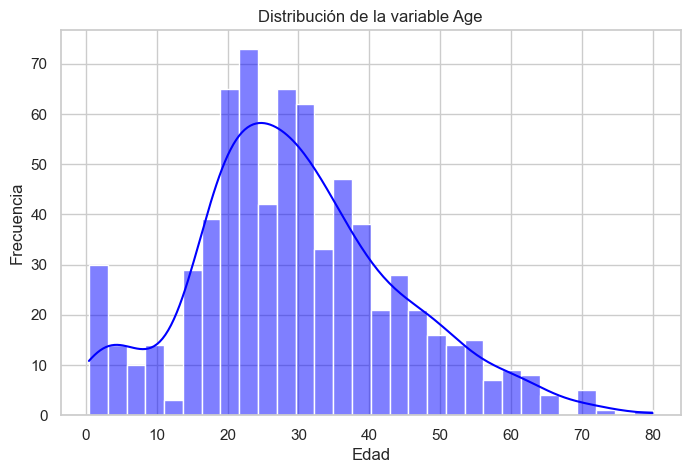

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos los datos
titanic = pd.read_csv('TitanicDataset (3).csv', delimiter='|')

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el histograma con Seaborn
plt.figure(figsize=(8,5))
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable Age")
plt.show()


8. Visualiza la correlación entre variables numéricas

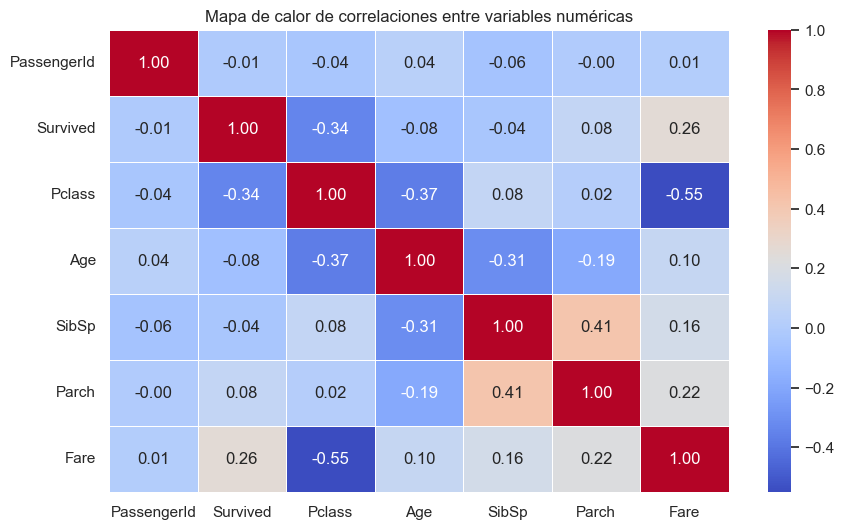

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos los datos
titanic = pd.read_csv('TitanicDataset (3).csv', delimiter='|')

# Calcular la matriz de correlación
correlation_matrix = titanic.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurar títulos
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

9. Analiza la relación entre la columna Survived y otras variables (como Sex y Pclass)

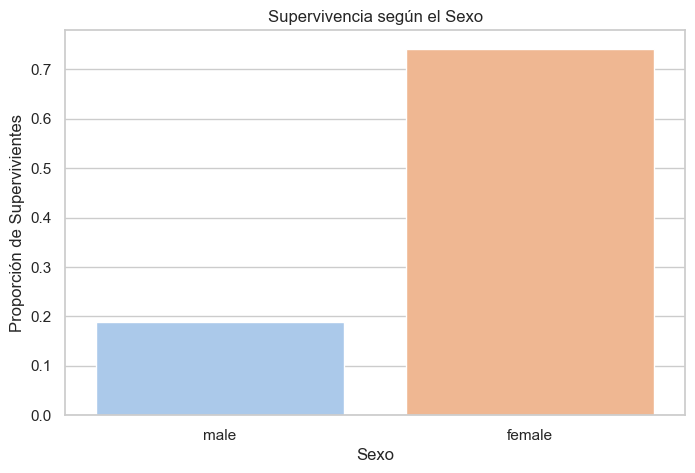

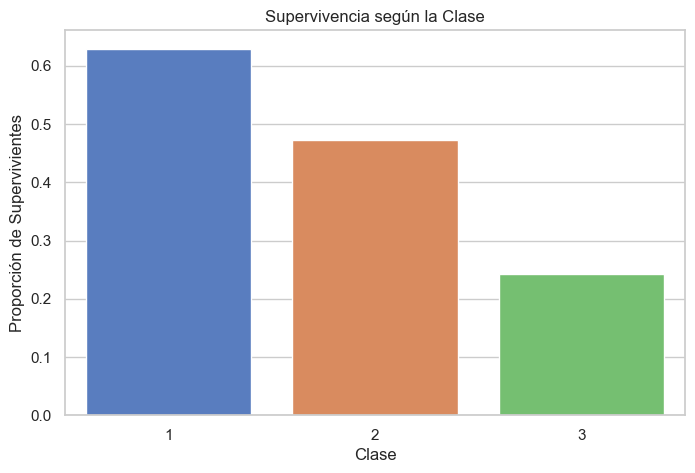

In [102]:
# Configurar el estilo
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Gráfico de barras para la supervivencia por Sexo
plt.figure(figsize=(8,5))
sns.barplot(x="Sex", y="Survived", data=titanic, ci=None, palette="pastel")
plt.xlabel("Sexo")
plt.ylabel("Proporción de Supervivientes")
plt.title("Supervivencia según el Sexo")
plt.show()

# Gráfico de barras para la supervivencia por Clase
plt.figure(figsize=(8,5))
sns.barplot(x="Pclass", y="Survived", data=titanic, ci=None, palette="muted")
plt.xlabel("Clase")
plt.ylabel("Proporción de Supervivientes")
plt.title("Supervivencia según la Clase")
plt.show()

10. ¿Qué patrones observa en la distribución de la edad y las correlaciones? ¿Qué variables parecen influir en la supervivencia?

In [ ]:
Desde el análisis de los datos del  Titanic, se ha identificado patrones claves como:

Edad: La mayoría de los pasajeros eran jóvenes. Los niños tuvieron mayor supervivencia, posiblemente por la prioridad de rescate. También hay valores atípicos en edades extremas.

Sexo: Las mujeres sobrevivieron más, siguiendo la política de “mujeres y niños primero”.

Clase (Pclass): Los pasajeros de primera clase tuvieron una mayor tasa de supervivencia que los de tercera clase.

Tarifa (Fare): Hay una relación positiva entre el valor del pasaje y la supervivencia, lo que sugiere que el nivel socioeconómico influyó en las posibilidades de escapar.

En conclusión, variables como el sexo, la clase, la edad y la tarifa pagada influyeron significativamente en la probabilidad de supervivencia.